In [1]:
#Ishank Jain
#20757588
#libraries
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.datasets import mnist
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def resize(images):
    resized_images = []
    for img in images:
        img = Image.fromarray(img)
        img = img.resize((32, 32))
        img = np.reshape(img, (32, 32, 1))
        resized_images.append(img)
    return np.array(resized_images)

In [4]:
batch_size = 64
num_classes = 10
epochs = 3

# input image dimensions to reshape data
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#converting data to 32x32 and normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = resize(x_train)
x_test = resize(x_test)

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
#block 1
model.add(Conv2D(64,(3, 3),
                 kernel_initializer='random_normal',
                 bias_initializer='zeros',
                 activation='relu',
                 padding ='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#block 2
model.add(Conv2D(128, (3, 3), activation='relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#block 3
model.add(Conv2D(256, (3, 3), activation='relu',padding ='same'))
model.add(Conv2D(256, (3, 3), activation='relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#block 4
model.add(Conv2D(512, (3, 3), activation='relu',padding ='same'))
model.add(Conv2D(512, (3, 3), activation='relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#block 5
model.add(Conv2D(512, (3, 3), activation='relu',padding ='same'))    
model.add(Conv2D(512, (3, 3), activation='relu',padding ='same'))   
model.add(MaxPooling2D(pool_size=(2, 2)))
#FC layer and flattening data from 3D to 2D 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
#Softmax layer
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=1e-5),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 107s 2ms/step - loss: 0.8948 - acc: 0.6831 - val_loss: 0.2623 - val_acc: 0.9175
Epoch 2/3
60000/60000 [==============================] - 103s 2ms/step - loss: 0.2095 - acc: 0.9344 - val_loss: 0.1274 - val_acc: 0.9590
Epoch 3/3
60000/60000 [==============================] - 187s 3ms/step - loss: 0.1259 - acc: 0.9611 - val_loss: 0.0977 - val_acc: 0.9683
Test loss: 0.09765285869240761
Test accuracy: 0.9683


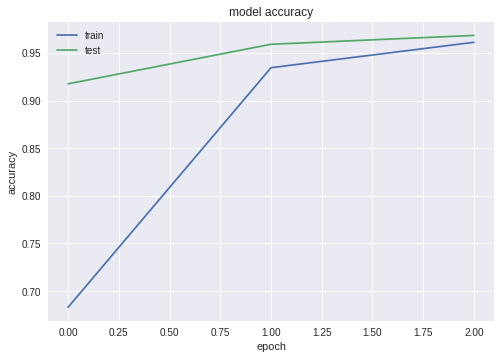

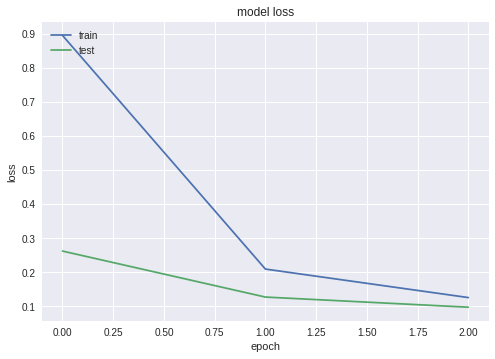

In [5]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()